In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import lstm

In [2]:
model = lstm.bmi_LSTM()
model.read_cfg_file('lstm-info.cfg')

In [3]:
model.initialize()

In [4]:
model.input_tensor.shape

torch.Size([2492, 11])

In [5]:
model.update()

updating for t:  1772
start_this_seq 1771
for time: 1773 lstm output: 26.464825059931275


In [6]:
model.input_tensor.shape

torch.Size([2492, 11])

In [7]:
model.update_until(model.iend)

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 20.112555098483824
updating for t:  1774
start_this_seq 1773
for time: 1775 lstm output: 16.852312281650512
updating for t:  1775
start_this_seq 1774
for time: 1776 lstm output: 14.78169671249273
updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 13.18190545875549
updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 12.08279310799716
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 11.01406926653117
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 9.938357575039204
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 9.656570041522016
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 9.124591010730807
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 8.506807724689041
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 8.548604331064814
updating for t:  1784
start_th

for time: 2072 lstm output: 2.4200098983683067
updating for t:  2072
start_this_seq 2071
for time: 2073 lstm output: 2.680657439513386
updating for t:  2073
start_this_seq 2072
for time: 2074 lstm output: 2.461543679243366
updating for t:  2074
start_this_seq 2073
for time: 2075 lstm output: 2.7655537521251152
updating for t:  2075
start_this_seq 2074
for time: 2076 lstm output: 2.6901448887069894
updating for t:  2076
start_this_seq 2075
for time: 2077 lstm output: 2.5331939542072255
updating for t:  2077
start_this_seq 2076
for time: 2078 lstm output: 2.646302654483003
updating for t:  2078
start_this_seq 2077
for time: 2079 lstm output: 2.192513291183907
updating for t:  2079
start_this_seq 2078
for time: 2080 lstm output: 3.0525996335971466
updating for t:  2080
start_this_seq 2079
for time: 2081 lstm output: 1.6017367037959203
updating for t:  2081
start_this_seq 2080
for time: 2082 lstm output: 2.926884498989923
updating for t:  2082
start_this_seq 2081
for time: 2083 lstm output

for time: 2390 lstm output: 22.678996488560134
updating for t:  2390
start_this_seq 2389
for time: 2391 lstm output: 21.64031562356037
updating for t:  2391
start_this_seq 2390
for time: 2392 lstm output: 20.347432874974988
updating for t:  2392
start_this_seq 2391
for time: 2393 lstm output: 19.42434560589411
updating for t:  2393
start_this_seq 2392
for time: 2394 lstm output: 18.497598997149446
updating for t:  2394
start_this_seq 2393
for time: 2395 lstm output: 18.116178543574904
updating for t:  2395
start_this_seq 2394
for time: 2396 lstm output: 17.29373873774295
updating for t:  2396
start_this_seq 2395
for time: 2397 lstm output: 16.83003092818789
updating for t:  2397
start_this_seq 2396
for time: 2398 lstm output: 16.374375136245614
updating for t:  2398
start_this_seq 2397
for time: 2399 lstm output: 15.59169182276291
updating for t:  2399
start_this_seq 2398
for time: 2400 lstm output: 15.415455377920548
updating for t:  2400
start_this_seq 2399
for time: 2401 lstm output

In [8]:
print(np.array(model.obs).shape)
print(len(model.output_list))

(720,)
720


Text(0, 0.5, 'precipitation (kg/m2)')

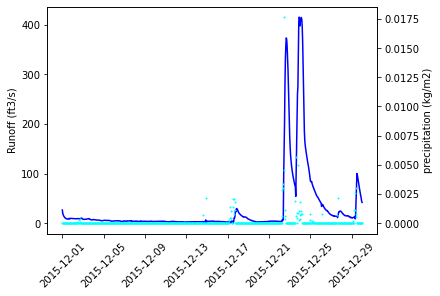

In [9]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model.test_date_start, model.test_date_end, freq="H")
ax.plot(xdata, model.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax.set_ylabel('Runoff (ft3/s)')
plt.xticks(rotation = 45)
ax2=ax.twinx()
ax2.scatter(xdata,model.forcings['RAINRATE'].values[-721:-24], s=1, c='cyan', label='precip')
ax2.set_ylabel('precipitation (kg/m2)')

In [10]:
model.get_time_step()

'1 hour'

In [11]:
model.get_attribute('model_name')

'LSTM for Next Generation NWM'

In [12]:
model.get_input_var_names()

['land_surface_radiation~incoming~longwave__energy_flux',
 'land_surface_air__pressure',
 'atmosphere_air_water~vapor__relative_saturation',
 'atmosphere_water__liquid_equivalent_precipitation_rate',
 'land_surface_radiation~incoming~shortwave__energy_flux',
 'land_surface_air__temperature',
 'land_surface_wind__x_component_of_velocity',
 'land_surface_wind__y_component_of_velocity']

In [13]:
model.get_output_var_names()

['land_surface_water__runoff_volume_flux']

In [14]:
model.get_var_name('atmosphere_water__liquid_equivalent_precipitation_rate')

'RAINRATE'

In [15]:
model.get_var_units('atmosphere_water__liquid_equivalent_precipitation_rate')

'kg m-2'

In [16]:
model.get_var_type("land_surface_water__runoff_volume_flux")

"<class 'float'>"

In [17]:
model.get_var_units("land_surface_water__runoff_volume_flux")

'mm'

In [18]:
model.get_var_rank("land_surface_water__runoff_volume_flux")

0

In [19]:
model.run_unit_tests()

Unit test passed: get_output_var_names
Unit test passed: get_var_name
Unit test passed: get_var_units
Unit test passed: get_var_rank
